# Generate mfccs from a time series


In [1]:

import librosa
import numpy as np
y, sr = librosa.load(librosa.ex('libri1'))
librosa.feature.mfcc(y=y, sr=sr)


array([[-565.9195   , -564.28815  , -562.8431   , ..., -437.97177  ,
        -426.48358  , -434.66782  ],
       [  10.304619 ,   12.508709 ,   14.130635 , ...,   89.98186  ,
          88.43013  ,   90.120255 ],
       [   9.748489 ,   11.672073 ,   12.139029 , ...,  -10.730866 ,
         -10.773366 ,   -5.2245674],
       ...,
       [   3.0373316,    2.2702894,   -1.3416184, ...,   -9.084095 ,
          -6.0139184,   -9.0218935],
       [   2.8072867,    2.067909 ,   -1.9095693, ...,   -6.449066 ,
          -6.7254477,   -5.1586246],
       [   2.8223813,    2.2442024,   -1.6846427, ...,   -8.387409 ,
          -6.1984453,   -6.1769404]], dtype=float32)


# Using a different hop length and HTK-style Mel frequencies


In [2]:


librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)


array([[-5.4707605e+02, -5.4636603e+02, -5.3756299e+02, ...,
        -4.5378317e+02, -4.4460797e+02, -4.2001767e+02],
       [ 1.3613814e+01,  1.4023203e+01,  2.5544178e+01, ...,
         9.3619942e+01,  9.7635750e+01,  9.8687302e+01],
       [ 1.2979423e+01,  1.1832460e+01,  2.0929573e+01, ...,
         3.0844744e+01,  1.6382248e+01,  5.3772936e+00],
       ...,
       [ 7.4608332e-01, -3.0014231e+00, -2.4928885e+00, ...,
        -3.5202198e+00, -8.3984756e+00, -1.1288631e+01],
       [ 4.0965915e-01, -2.0294819e+00, -3.4999755e-01, ...,
        -8.7646332e+00, -1.0507265e+01, -1.1298368e+01],
       [-1.1186570e-01, -1.6880454e+00,  7.1726590e-01, ...,
        -3.2927551e+00, -3.4424963e+00, -4.6867428e+00]], dtype=float32)


# Use a pre-computed log-power Mel spectrogram


In [3]:


S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                   fmax=8000)
librosa.feature.mfcc(S=librosa.power_to_db(S))


array([[-5.5997437e+02, -5.5844916e+02, -5.5695001e+02, ...,
        -4.2392285e+02, -4.1196042e+02, -4.2045792e+02],
       [ 1.1018242e+01,  1.3046116e+01,  1.4626853e+01, ...,
         8.1172806e+01,  7.6971542e+01,  8.0888069e+01],
       [ 1.0409790e+01,  1.2093787e+01,  1.2224331e+01, ...,
        -1.3710319e+01, -8.7659769e+00, -5.3241444e+00],
       ...,
       [ 2.6907282e+00,  2.0947845e+00, -2.1460226e+00, ...,
        -8.4138012e+00, -8.0626297e+00, -6.1864271e+00],
       [ 2.7126925e+00,  2.3788264e+00, -1.3990479e+00, ...,
        -3.2831919e+00,  1.4638872e+00, -2.8352108e+00],
       [ 2.7118654e+00,  2.6189365e+00, -3.9603180e-01, ...,
         5.6303501e+00,  2.2087641e+00,  6.4751792e-01]], dtype=float32)


# Get more components


In [4]:


mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)



# Visualize the MFCC series


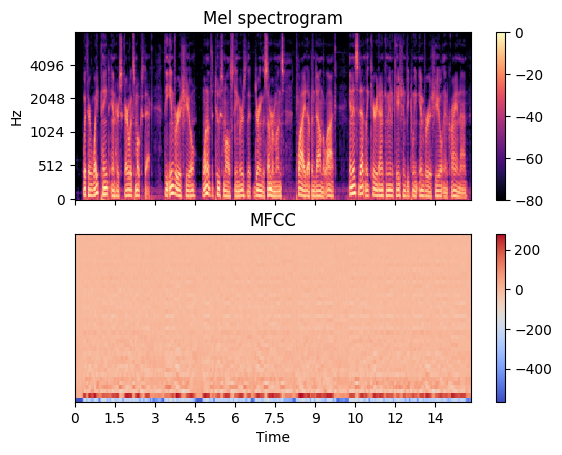

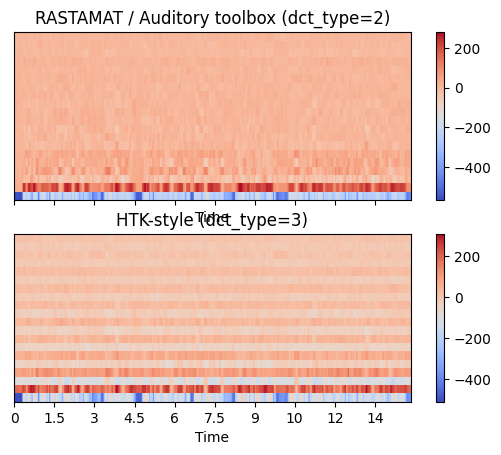

In [5]:


import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

# Compare different DCT bases

m_slaney = librosa.feature.mfcc(y=y, sr=sr, dct_type=2)
m_htk = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img1 = librosa.display.specshow(m_slaney, x_axis='time', ax=ax[0])
ax[0].set(title='RASTAMAT / Auditory toolbox (dct_type=2)')
fig.colorbar(img, ax=[ax[0]])
img2 = librosa.display.specshow(m_htk, x_axis='time', ax=ax[1])
ax[1].set(title='HTK-style (dct_type=3)')
fig.colorbar(img2, ax=[ax[1]])